# Titanic 

## Import all the Libraries which is required for our Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## Import datasets using Pandas Dataframe

In [2]:
itanic_test = pd.read_csv('../input/titanic-test/titanic_test.csv')
titanic_train = pd.read_csv('../input/titanic-train/titanic_train.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perform Exploratory Data Analysis

In [4]:
titanic_train.shape

(891, 12)

In [5]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## out of the 891 passengers 549 lost their life and 342 passengers survived and plot the graph for Survived column

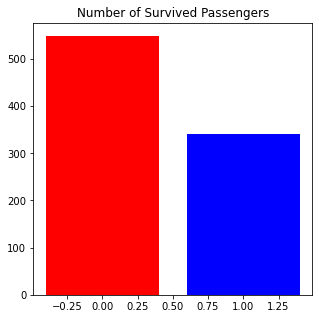

In [6]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=['r','b'])
'''x = [0, 1]
ax1 = plt.subplot()
ax1.set_xticks(x)
ax1.set_xticklabels([ "Not Survived/Die", "Survived"])'''
plt.title('Number of Survived Passengers')
plt.show()

## maximum passengers lost their life and as compare to those less passengers are survived

In [7]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## we will see here 491 passengers in class 3 , 216 comes under the class 1, 184 comes under the class 2

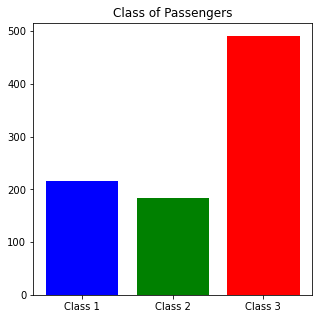

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=['r','b','g'])
x = [ 1, 2, 3]
ax1 = plt.subplot()
ax1.set_xticks(x)
ax1.set_xticklabels(["Class 1","Class 2","Class 3"])
plt.title('Class of Passengers')
plt.show()

## red color shows the Most of the passenger belongs to class 3

## i will check how Many Male and Female survived in Titanic
## And findout the Frequency Distribution over here

In [9]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## looking above values their are 577 male and 314 are females passengers
## and plot the graph for sex column also

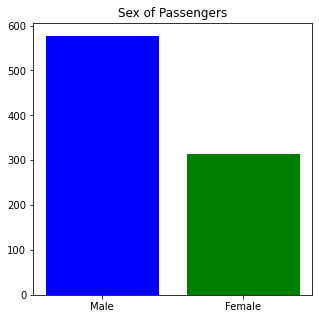

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=['b','g'])
x = [ 0, 1]
ax1 = plt.subplot()
ax1.set_xticks(x)
ax1.set_xticklabels(["Male","Female" ])
plt.title('Sex of Passengers')
plt.show()

## by looking above figure maximum Number of the male are servived than the Females
## then plot the Distribution graph for age column

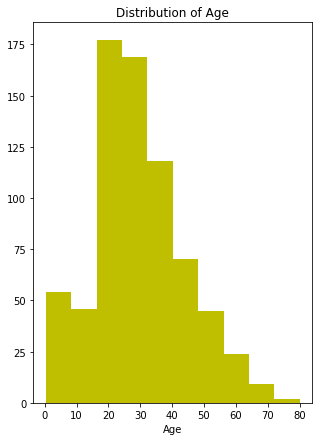

In [11]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'] ,color='y')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

## here we will see maximum number of passengers survived in beetween the age 25 to 40.

## we would need to predict on the test data how many passengers are survived
## for building our model first we want to check any missing values are present in the dataset or not.

In [12]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## we will see some null values are here

In [13]:
titanic_train['Survived'].isna().sum()
#dependent variable

0

In [14]:
titanic_train['Age'].isna().sum()      
# age is independent variable

177

In [16]:
#titanic_train = titanic_train.dropna()
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())

In [17]:
titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## drop all the null values from age column

In [18]:
x_train = titanic_train[['Age']]
Y_train = titanic_train[['Survived']]

## here Extract Independent and dependent Veriable 


# Build Model 
##classification model i.e decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
data = DecisionTreeClassifier()

In [21]:
data.fit(x_train,Y_train)

DecisionTreeClassifier()

## here i have successfully built our model
## first i would like to check null values for age column in the test dataset

In [22]:
titanic_test['Age'].isnull().sum()

86

## some null values are presented here then i will drop those null values

In [23]:
titanic_test = titanic_test.dropna()

In [24]:
titanic_test['Age'].isnull().sum()

0

## then Predicting the values using test dataset

In [25]:
x_test = titanic_test[['Age']]

In [26]:
y_predict = data.predict(x_test)

In [27]:
y_predict

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

## finally check the score of the model 

In [28]:
data.score(x_test,y_predict)

1.0